Observations: 
- From the scatter plot, mouse weight and average tumor volume for the Capomulin treatment regimen have a positive correlation. 
- The strength of correlation for the scatter plot is strong because the r value is greater than 0.7 with a value of 0.84
-

In [3]:
%matplotlib notebook 

In [4]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import scipy.stats as sts 
from scipy.stats import linregress

# Study data files 
mouse_metadata_path = "Data/Mouse_metadata copy.csv"
study_results_path = "Data/Study_results copy.csv"

# Read the mouse data and the study results 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
combined_mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice 
number_mice = combined_mouse_df["Mouse ID"].nunique()
number_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mice = combined_mouse_df.loc[combined_mouse_df.duplicated(subset = 
                                    ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Get all the data for the duplicate mouse ID
data_duplicate = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(duplicate_mice)]
data_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID 
cleaned_mouse_df = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(duplicate_mice) == False]
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame 
clean_mouse_count = cleaned_mouse_df["Mouse ID"].nunique()
clean_mouse_count

248

# Summary Statistics 

In [10]:
# Mean 
summary_mean = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_mean

# Median 
summary_median = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_median

# Variance 
summary_variance = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_variance

# Standard Deviation 
summary_stdv = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stdv

# SEM 
summary_sem = combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_sem

# Summary Table 
summary_stats_df = pd.DataFrame({"Mean Tumor Volume " : summary_mean, 
                                "Median Tumor Volume " : summary_median, 
                                "Tumor Volume Variance" : summary_variance, 
                                "Tumor Volume Standard Deviation" : summary_stdv, 
                                "Tumor Volume Standard Error" : summary_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Summary Statistics using Aggregation Method 

summary_stats_agg = combined_mouse_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg([np.mean, 
                                                                  np.median,
                                                                  np.var,
                                                                  np.std,
                                                                  sts.sem])

summary_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<IPython.core.display.Javascript object>


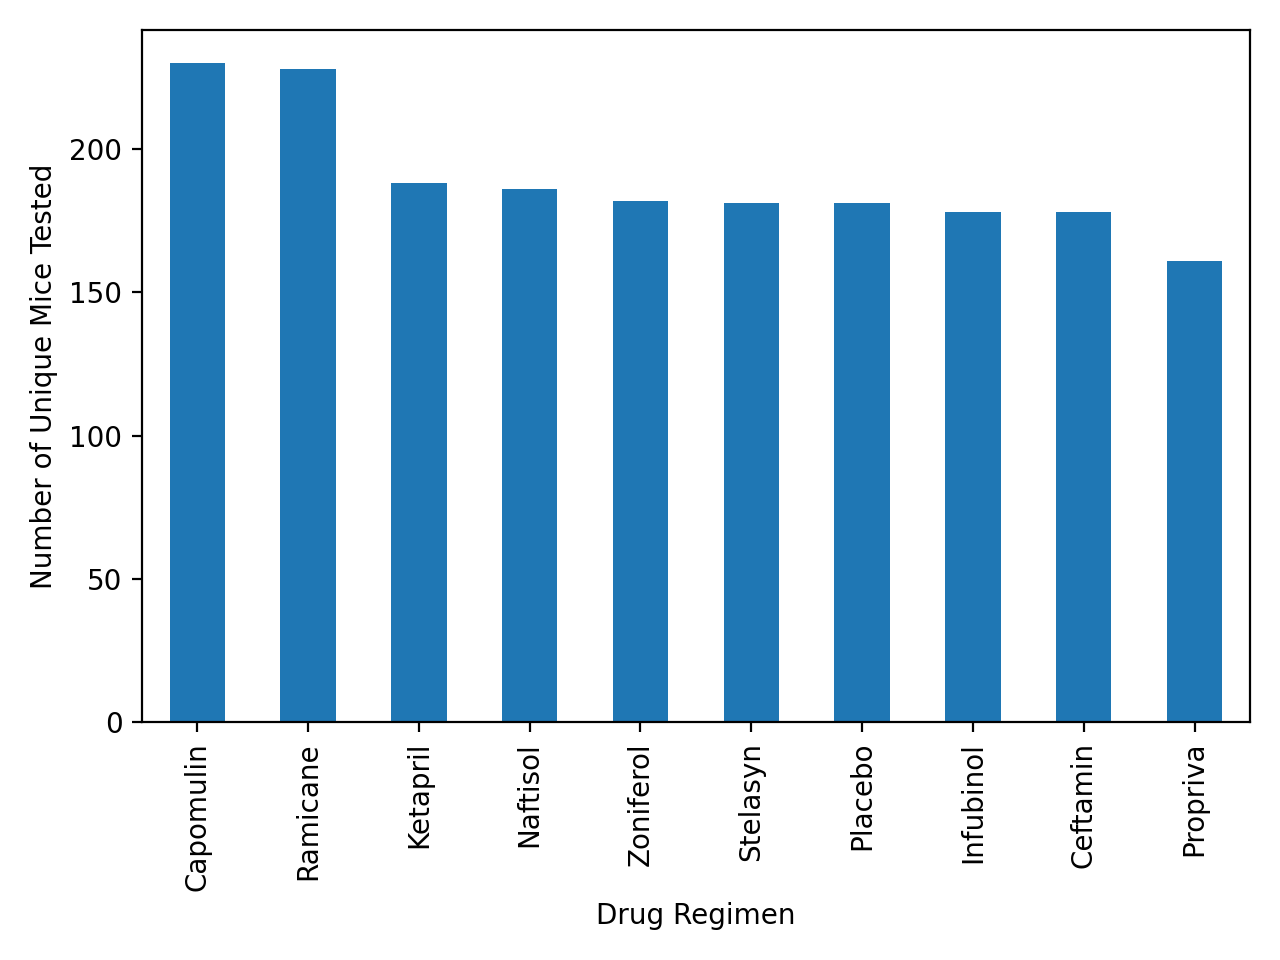

In [12]:
# Bar Chart using DataFrame.plot()

# Drug Regimen 
drg_group = combined_mouse_df["Drug Regimen"].value_counts()

# Bar Chart 
drg_chart = drg_group.plot(kind = "bar")
drg_chart.set_xlabel("Drug Regimen")
drg_chart.set_ylabel("Number of Unique Mice Tested")

plt.show()
plt.tight_layout()

In [13]:
%matplotlib notebook 

In [14]:
import matplotlib.pyplot as plt 

<IPython.core.display.Javascript object>


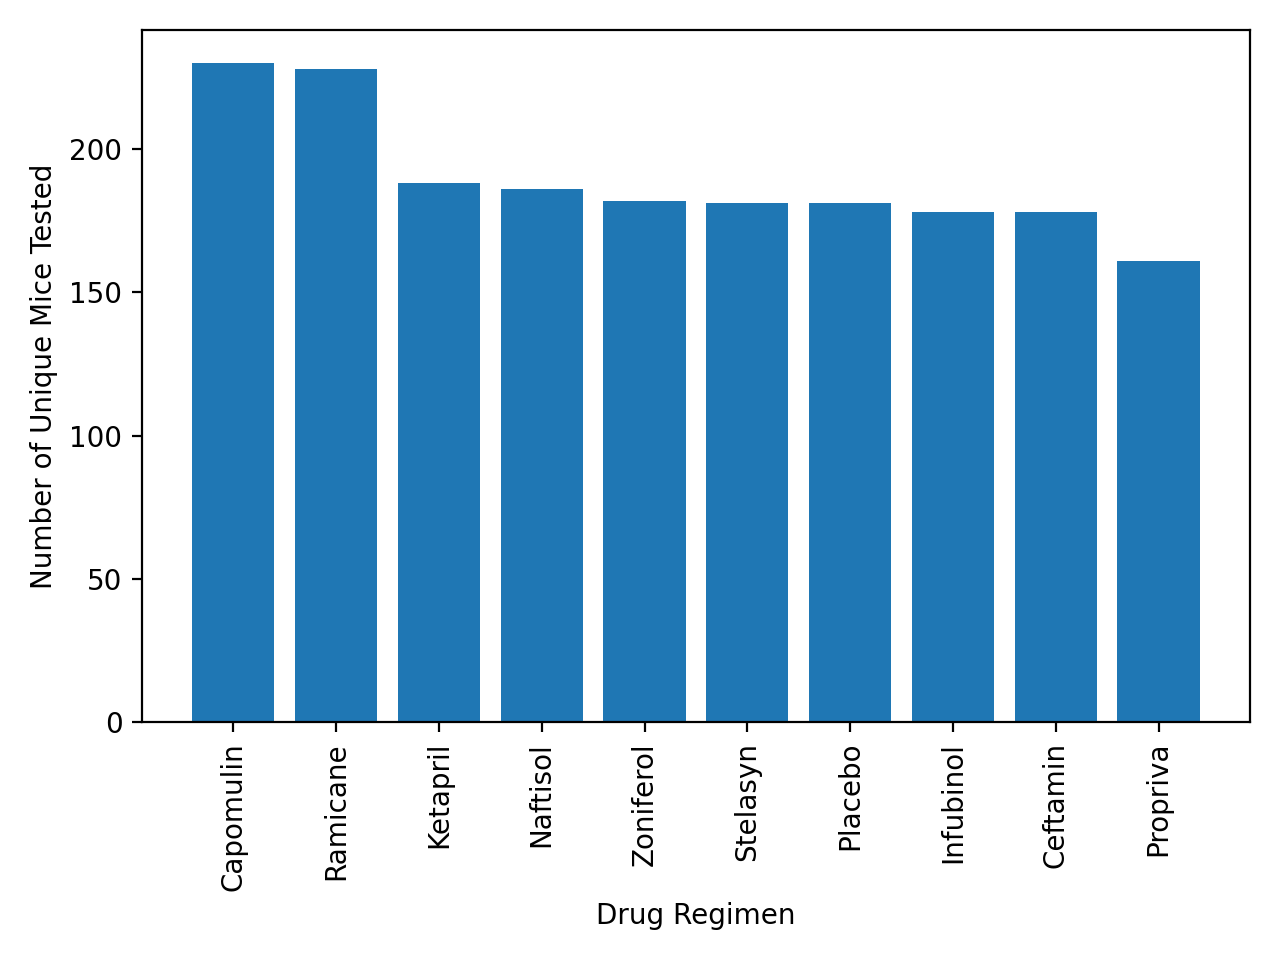

In [15]:
# Bar Chart using pyplot 

# Drug Regimen
drg_group = combined_mouse_df["Drug Regimen"].value_counts()

# Bar Chart 
plt.bar(drg_group.index.values, drg_group)
plt.xticks(rotation = "vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()
plt.tight_layout()

In [16]:
%matplotlib notebook 

In [17]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


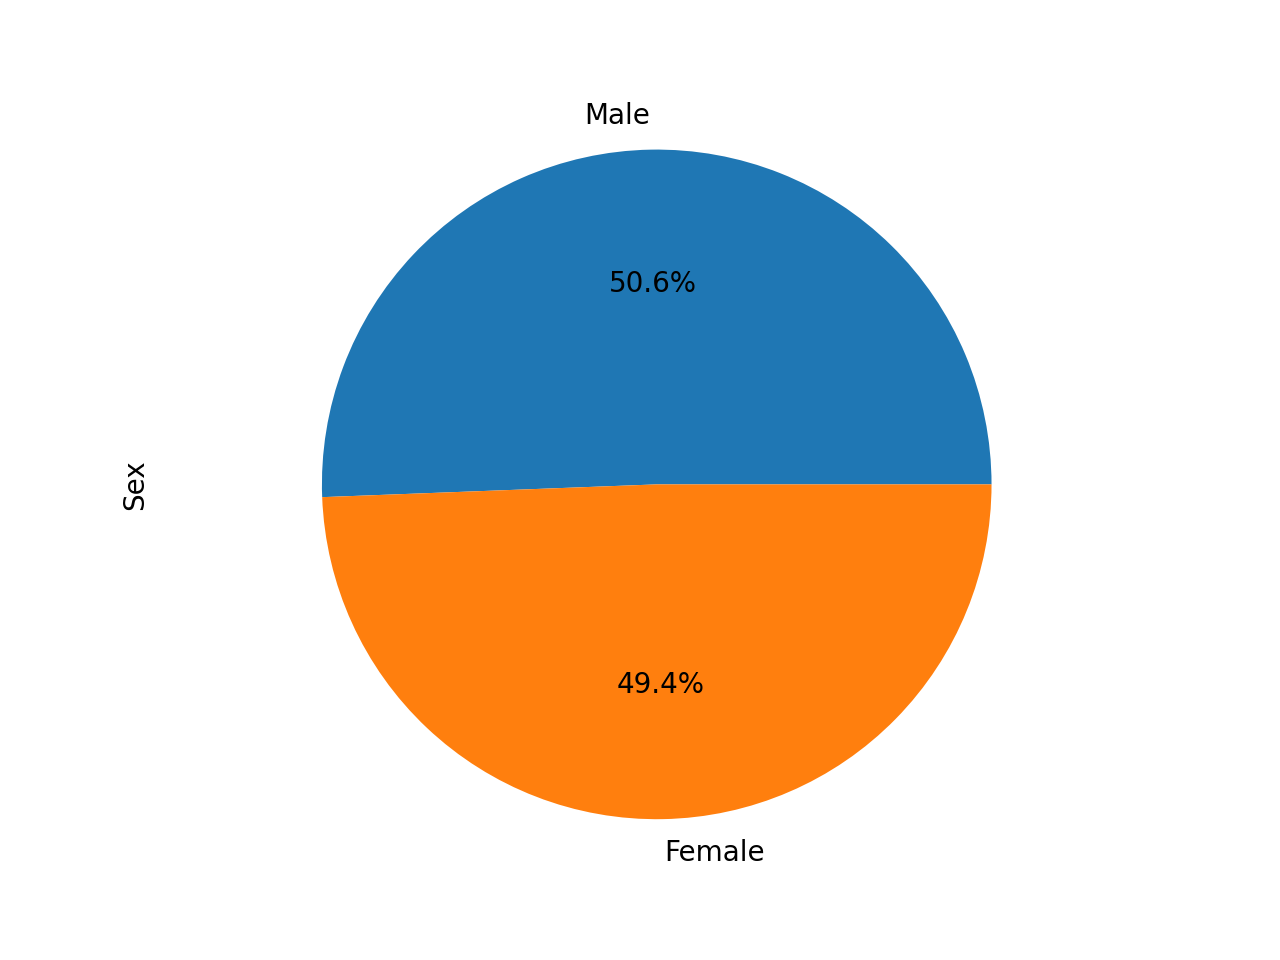

In [18]:
# Pie Chart using DataFrame.plot()

# Gender
gender_group = combined_mouse_df["Sex"].value_counts()

# Pie Chart 
gender_chart = gender_group.plot(kind = "pie", y = "Sex",
                                autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

In [19]:
%matplotlib notebook 

In [20]:
import matplotlib.pyplot as plt 

<IPython.core.display.Javascript object>


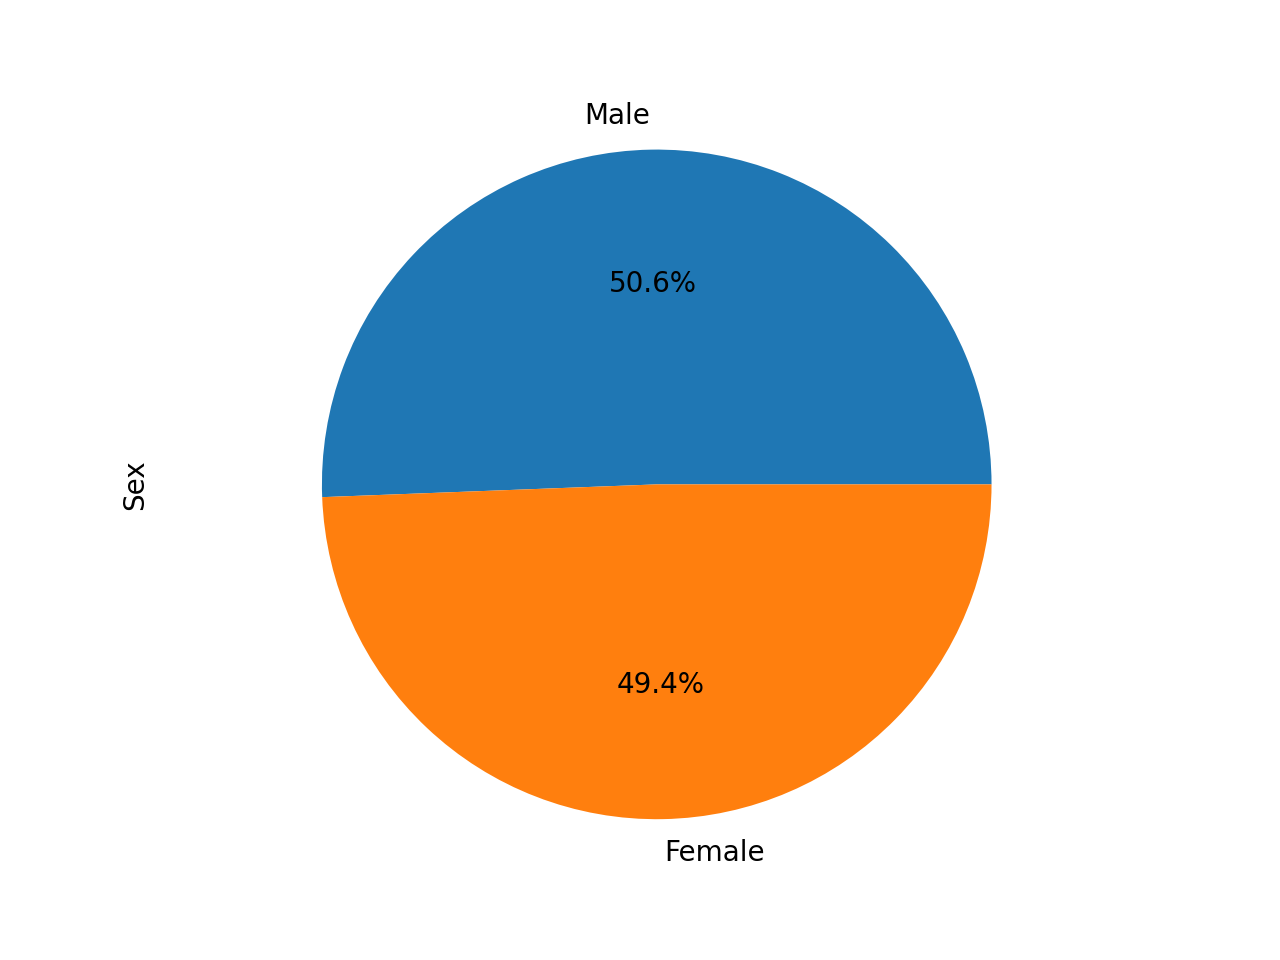

In [21]:
# Bar Chart using pyplot 

# Gender
gender_group = combined_mouse_df["Sex"].value_counts()

# Labels 
labels = ["Male", "Female"]

# Pie Chart 
plt.pie(gender_group, labels = labels, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

# Quartiles, Outliers, and Boxplots

In [22]:
%matplotlib notebook

In [23]:
import matplotlib.pyplot as plt 

In [24]:
# Calculate the final tumor volume 

# Getting the last (greatest) timepoint for each mouse 
max_tumor = combined_mouse_df.groupby("Mouse ID")["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(combined_mouse_df ,on = ['Mouse ID','Timepoint'], how = "left")

In [25]:
# Code given by Intstructor 

# Treatments into a list for for loop 
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

# Calculate the IQR 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # Add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


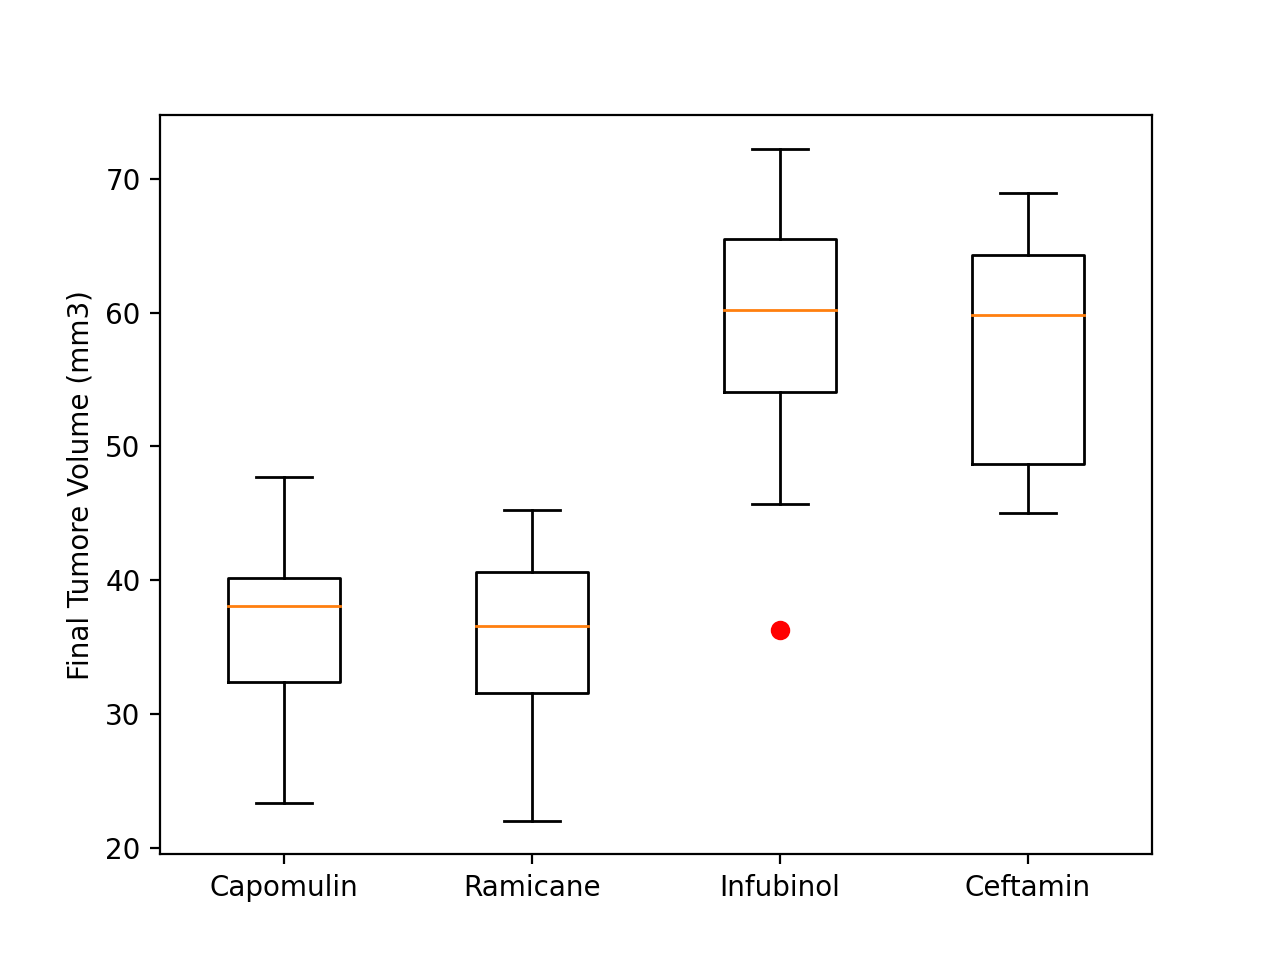

In [26]:
# Generate a box plot 

# Labels 
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, labels = Regimen, sym = 'r')
ax1.set_ylabel("Final Tumore Volume (mm3)")
plt.show()

# Line and Scatter Plots

In [27]:
%matplotlib notebook 

In [28]:
import matplotlib.pyplot as plt 

<IPython.core.display.Javascript object>


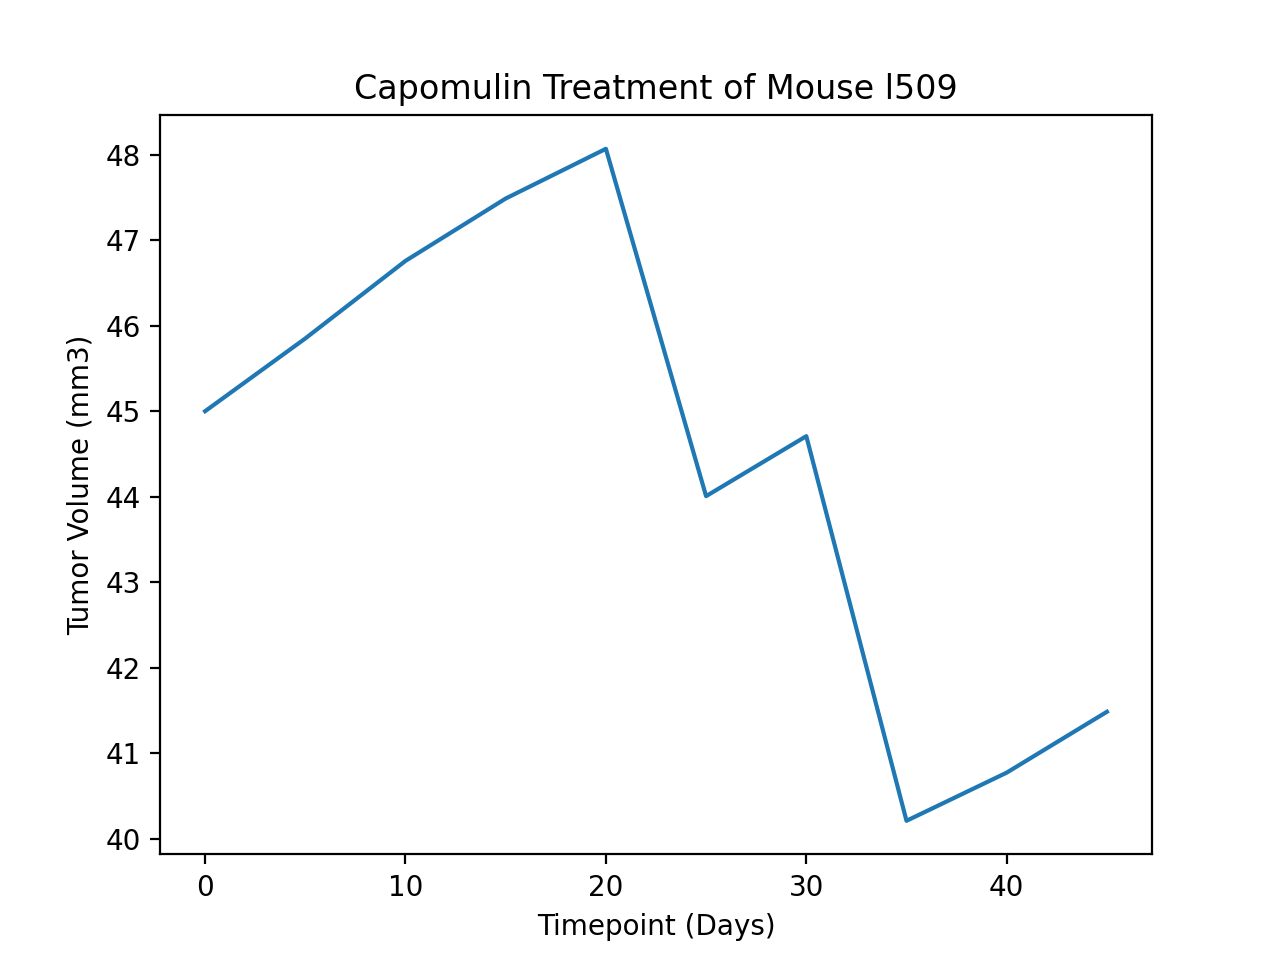

In [29]:
# Generate a line plot 

# l509 Data
line_data =  combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "l509", :]

# Axes 
x_axis = line_data["Timepoint"]
y_axis = line_data["Tumor Volume (mm3)"]

# Line Plot 
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [30]:
%matplotlib notebook 

In [31]:
import matplotlib.pyplot as plt 

<IPython.core.display.Javascript object>


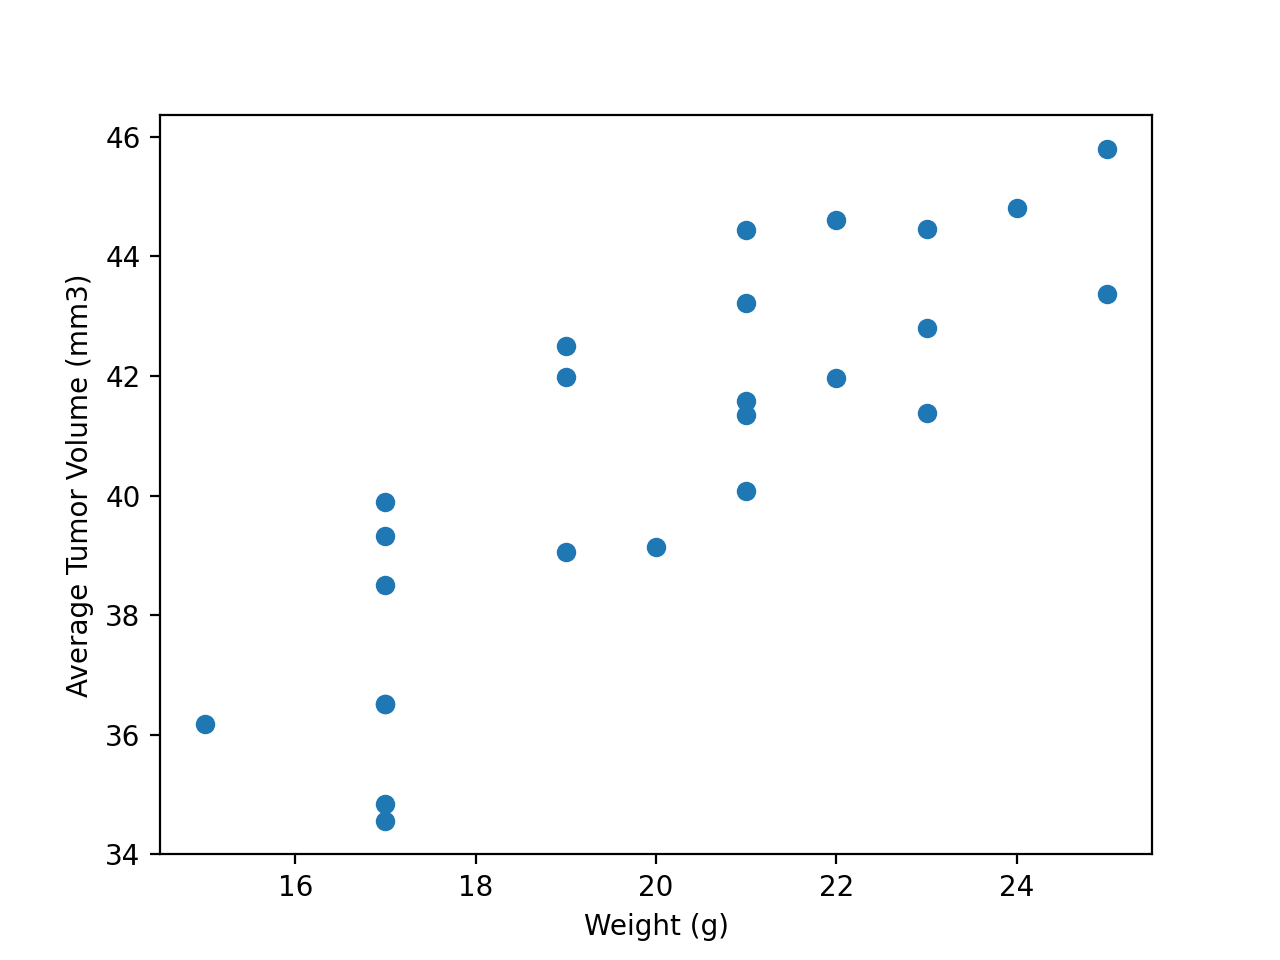

In [32]:
# Generate a Scatter plot 

# Capomulin Regimen 
scatter_data =  combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin", :]
scatter_data
# Average Tumor Volume for the Capomulin Regimen 
avg_tvol = scatter_data.groupby(["Mouse ID"]).mean()

# Scatter
plt.scatter(avg_tvol["Weight (g)"], avg_tvol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

In [33]:
%matplotlib notebook 

In [34]:
import matplotlib.pyplot as plt 

The correlation coefficient between mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


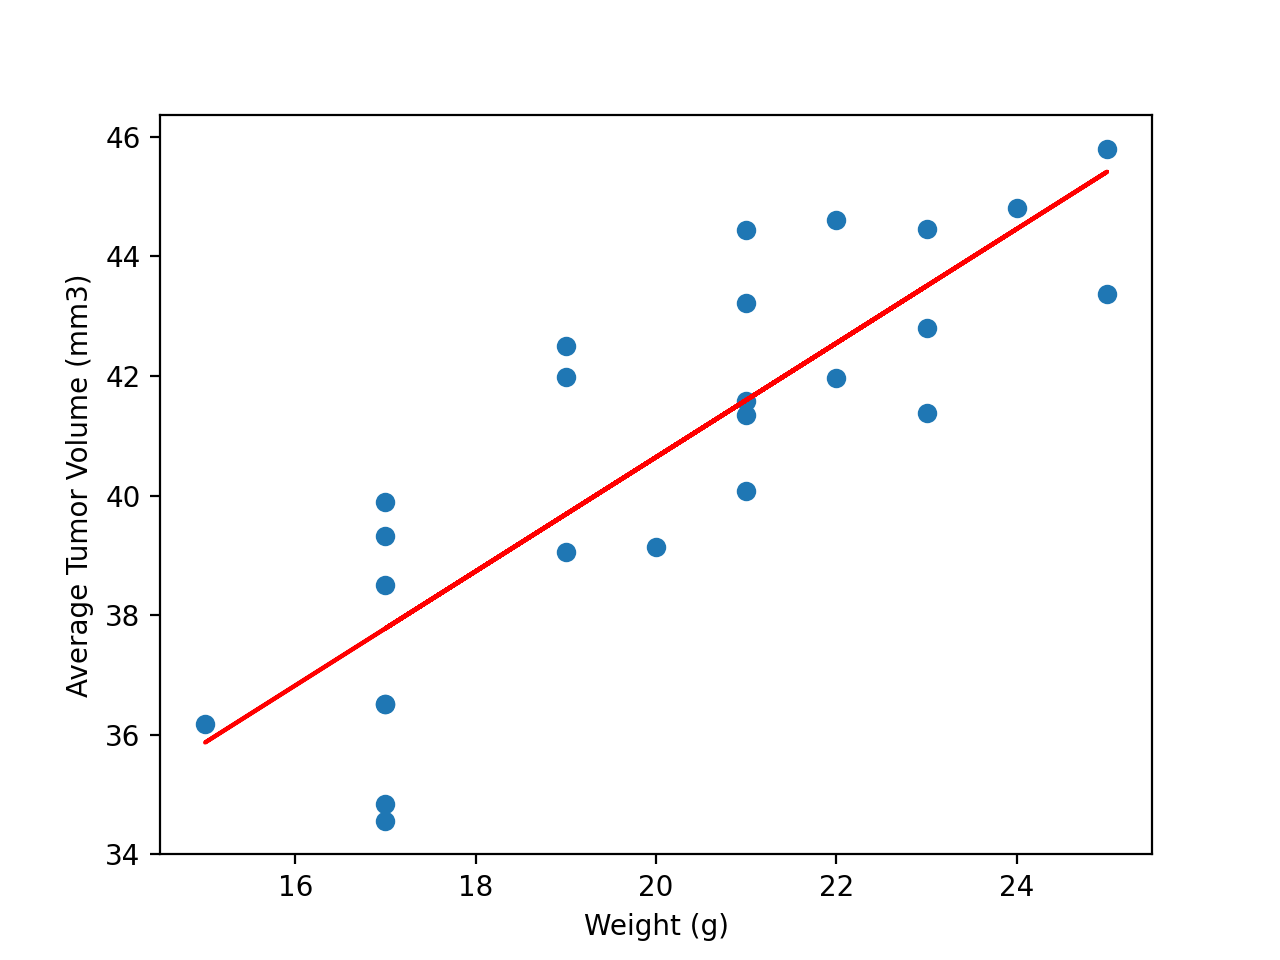

In [35]:
# Correlation Coefficient and Linear Regression Model 

# Generate Scatter Plot 
corr_data =  combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin", :]

# Average Tumor Volume for the Capomulin Regimen 
corr_avg_tvol = corr_data.groupby(["Mouse ID"]).mean()

# Correlation Coefficient 

mouse_weight = corr_avg_tvol["Weight (g)"]
avg_tvol_cap = corr_avg_tvol["Tumor Volume (mm3)"]

correlation = sts.pearsonr(mouse_weight, avg_tvol_cap)

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Scatter
plt.scatter(corr_avg_tvol["Weight (g)"], corr_avg_tvol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Linear Regression 

# Axes 
x_values = corr_avg_tvol["Weight (g)"]
y_values = corr_avg_tvol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")